# Linear regression

Notebook to make forecasts using linear regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from linear_regression import get_feature
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

In [2]:
from linear_regression import backtest

## Predictions using sales

### Predictions when removing the seasonality

In [3]:
error = pd.read_csv('linear_regression/sales_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000021  0.004564  0.003674  1.435141  0.388422
1           1   -2  0.000022  0.004700  0.003817  1.867633  0.351422
2           2   -3  0.000024  0.004909  0.003900  1.915599  0.292317
3           3   -4  0.000024  0.004944  0.003860  1.949318  0.282171
4           4   -5  0.000025  0.004951  0.003810  1.962550  0.280416
5           5   -6  0.000025  0.005023  0.003834  1.886812  0.259125


We get the better results for lag 1. Let us plot the predictions.

In [4]:
data = get_feature('sales_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 6, 1)
(y, y_hat) = backtest('sales_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

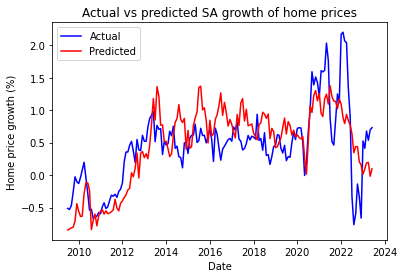

In [5]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [6]:
error = pd.read_csv('linear_regression/sales_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000048  0.006945  0.005709  4.909791  0.184071
1           1   -2  0.000061  0.007824  0.006361  4.812474 -0.035631
2           2   -3  0.000068  0.008275  0.006645  3.800256 -0.158434
3           3   -4  0.000072  0.008475  0.006770  3.465659 -0.215096
4           4   -5  0.000072  0.008487  0.006706  3.057746 -0.218583
5           5   -6  0.000069  0.008307  0.006667  4.129822 -0.167614


We get the better results for lag 1. Let us plot the predictions.

In [7]:
(y, y_hat) = backtest('sales_raw', 1, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

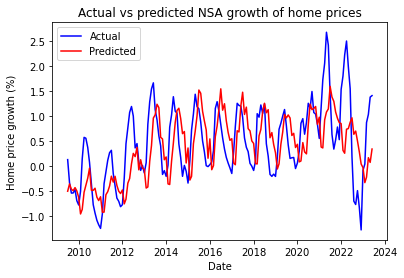

In [8]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using inventory

### Predictions when removing the seasonality

In [9]:
error = pd.read_csv('linear_regression/inventory_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000054  0.007358  0.005340  4.613547  0.012337
1           1   -2  0.000056  0.007479  0.005358  4.237995 -0.020261
2           2   -3  0.000057  0.007581  0.005333  3.712440 -0.048409
3           3   -4  0.000060  0.007723  0.005462  3.730888 -0.087864
4           4   -5  0.000062  0.007852  0.005530  3.176223 -0.124624
5           5   -6  0.000063  0.007931  0.005538  2.874936 -0.147348


We get the better results for lag 1. Let us plot the predictions.

In [10]:
data = get_feature('inventory_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 6, 1)
(y, y_hat) = backtest('inventory_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

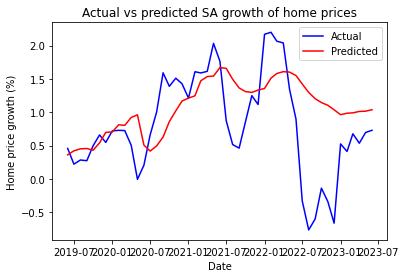

In [11]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [12]:
error = pd.read_csv('linear_regression/inventory_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000074  0.008581  0.006701  1.971142  0.040764
1           1   -2  0.000069  0.008332  0.006167  2.168887  0.095595
2           2   -3  0.000070  0.008370  0.005989  1.926017  0.087380
3           3   -4  0.000075  0.008667  0.005919  1.736949  0.021495
4           4   -5  0.000082  0.009036  0.006181  1.649907 -0.063762
5           5   -6  0.000086  0.009297  0.006688  1.648612 -0.126019


We get the better results for lag 2. Let us plot the predictions.

In [13]:
(y, y_hat) = backtest('inventory_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

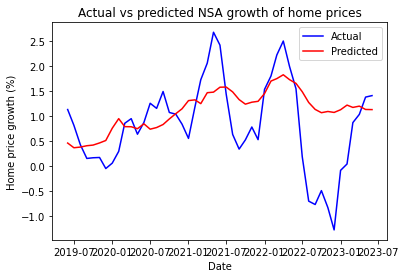

In [14]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using new listings

### Predictions when removing the seasonality

In [15]:
error = pd.read_csv('linear_regression/new_listings_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000058  0.007624  0.006045  3.791393 -0.060370
1           1   -2  0.000059  0.007650  0.005949  3.306463 -0.067499
2           2   -3  0.000060  0.007746  0.005949  2.794698 -0.094526
3           3   -4  0.000061  0.007803  0.005943  2.839967 -0.110742
4           4   -5  0.000062  0.007852  0.006026  2.676791 -0.124728
5           5   -6  0.000060  0.007770  0.005948  2.606761 -0.101302


We get the better results for lag 1. Let us plot the predictions.

In [16]:
data = get_feature('new_listings_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 6, 1)
(y, y_hat) = backtest('new_listings_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

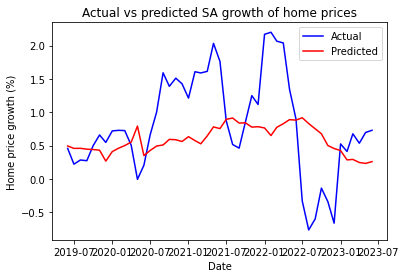

In [17]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [18]:
error = pd.read_csv('linear_regression/new_listings_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000078  0.008840  0.007119  1.157746 -0.018024
1           1   -2  0.000083  0.009115  0.007393  1.666785 -0.082346
2           2   -3  0.000074  0.008577  0.006857  1.952252  0.041590
3           3   -4  0.000062  0.007845  0.006176  1.752753  0.198266
4           4   -5  0.000061  0.007801  0.006196  1.538049  0.207085
5           5   -6  0.000073  0.008537  0.006612  1.348360  0.050504


We get the better results for lag 5. Let us plot the predictions.

In [19]:
(y, y_hat) = backtest('new_listings_raw', 5, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

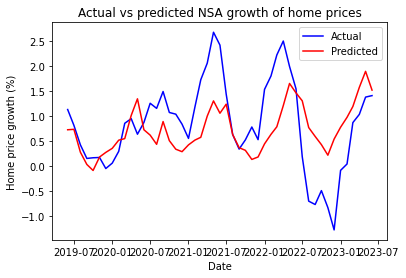

In [20]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using mean days to pending

### Predictions when removing the seasonality

In [21]:
error = pd.read_csv('linear_regression/mean_days_to_pending_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000054  0.007318  0.005357  2.758435  0.023128
1           1   -2  0.000057  0.007547  0.005631  2.829667 -0.038979
2           2   -3  0.000060  0.007745  0.005871  2.760781 -0.094245
3           3   -4  0.000061  0.007828  0.005955  2.816265 -0.117612
4           4   -5  0.000062  0.007884  0.006047  2.808449 -0.133899
5           5   -6  0.000063  0.007916  0.006017  2.770259 -0.143085


We get the better results for lag 1. Let us plot the predictions.

In [22]:
data = get_feature('mean_days_to_pending_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 6, 1)
(y, y_hat) = backtest('mean_days_to_pending_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

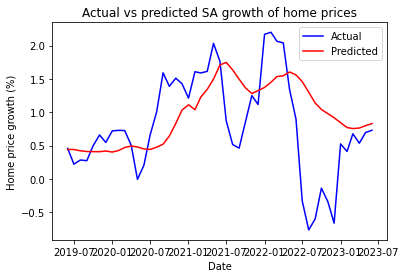

In [23]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [24]:
error = pd.read_csv('linear_regression/mean_days_to_pending_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000074  0.008625  0.006636  1.565277  0.030875
1           1   -2  0.000082  0.009079  0.007314  1.839214 -0.073806
2           2   -3  0.000084  0.009179  0.007429  1.834787 -0.097547
3           3   -4  0.000084  0.009155  0.007303  1.692519 -0.091858
4           4   -5  0.000086  0.009270  0.007381  1.546550 -0.119519
5           5   -6  0.000091  0.009540  0.007593  1.485465 -0.185704


We get the better results for lag 1. Let us plot the predictions.

In [25]:
(y, y_hat) = backtest('mean_days_to_pending_raw', 1, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

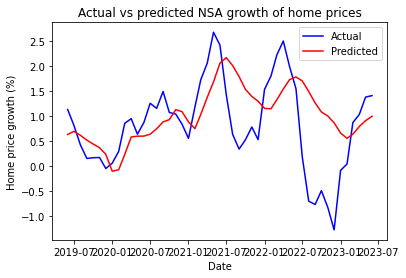

In [26]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using mean sale-to-list ratio

### Predictions when removing the seasonality

In [27]:
error = pd.read_csv('linear_regression/mean_sale_to_list_ratio_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000053  0.007297  0.005017  2.862850  0.048409
1           1   -2  0.000062  0.007882  0.005469  2.987554 -0.110313
2           2   -3  0.000067  0.008162  0.005750  2.809584 -0.190700
3           3   -4  0.000068  0.008230  0.005882  2.803171 -0.210554
4           4   -5  0.000067  0.008160  0.005997  2.825588 -0.190007
5           5   -6  0.000065  0.008085  0.006006  2.833980 -0.168168


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [28]:
data = get_feature('mean_sale_to_list_ratio_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 5, 1)
(y, y_hat) = backtest('mean_sale_to_list_ratio_raw', 2, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

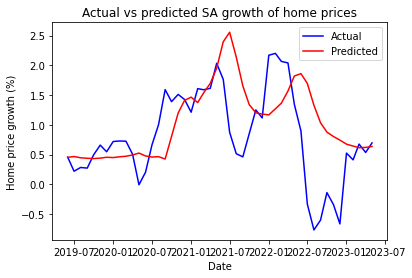

In [29]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [30]:
error = pd.read_csv('linear_regression/mean_sale_to_list_ratio_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000069  0.008333  0.006392  1.454487  0.105703
1           1   -2  0.000085  0.009195  0.007337  1.875510 -0.088973
2           2   -3  0.000090  0.009491  0.007736  1.945431 -0.160149
3           3   -4  0.000090  0.009503  0.007636  1.785532 -0.163092
4           4   -5  0.000092  0.009589  0.007670  1.554605 -0.184175
5           5   -6  0.000095  0.009748  0.007686  1.400101 -0.223779


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [31]:
(y, y_hat) = backtest('mean_sale_to_list_ratio_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

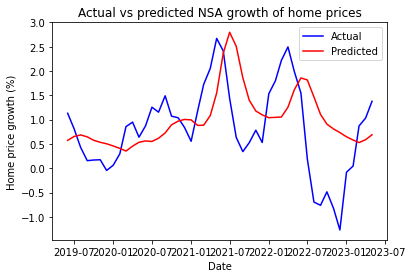

In [32]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using median days to pending

### Predictions when removing the seasonality

In [33]:
error = pd.read_csv('linear_regression/median_days_to_pending_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000042  0.006481  0.004699  2.663343  0.233846
1           1   -2  0.000044  0.006628  0.004704  2.773221  0.198693
2           2   -3  0.000045  0.006743  0.004689  2.846899  0.170580
3           3   -4  0.000048  0.006951  0.004991  2.802396  0.118619
4           4   -5  0.000052  0.007231  0.005256  2.960427  0.046142
5           5   -6  0.000058  0.007638  0.005421  3.008071 -0.064196


We get the better results for lag 1. Let us plot the predictions.

In [34]:
data = get_feature('median_days_to_pending_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 6, 1)
(y, y_hat) = backtest('median_days_to_pending_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

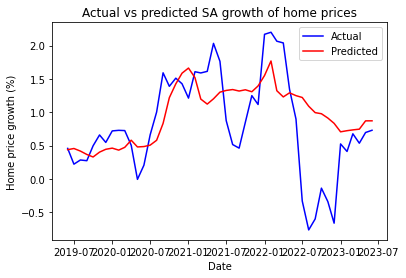

In [35]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [36]:
error = pd.read_csv('linear_regression/median_days_to_pending_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000057  0.007519  0.005399  1.209540  0.263480
1           1   -2  0.000070  0.008393  0.006606  1.621443  0.082359
2           2   -3  0.000080  0.008928  0.007306  1.795999 -0.038421
3           3   -4  0.000085  0.009229  0.007473  1.698899 -0.109623
4           4   -5  0.000087  0.009332  0.007356  1.500873 -0.134541
5           5   -6  0.000090  0.009490  0.007421  1.359564 -0.173262


We get the better results for lag 1. Let us plot the predictions.

In [37]:
(y, y_hat) = backtest('median_days_to_pending_raw', 1, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

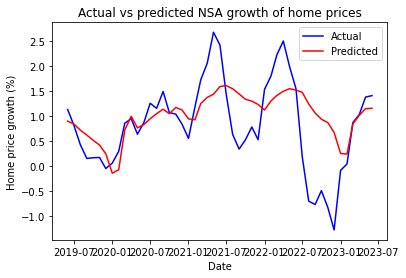

In [38]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using median sale-to-list ratio

### Predictions when removing the seasonality

In [39]:
error = pd.read_csv('linear_regression/median_sale_to_list_ratio_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000050  0.007050  0.005013  3.490593  0.111685
1           1   -2  0.000058  0.007583  0.005287  3.455936 -0.027789
2           2   -3  0.000062  0.007855  0.005341  3.086245 -0.102878
3           3   -4  0.000063  0.007943  0.005447  2.865437 -0.127620
4           4   -5  0.000064  0.008009  0.005822  2.912976 -0.146577
5           5   -6  0.000065  0.008066  0.005870  2.887539 -0.162853


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [40]:
data = get_feature('median_sale_to_list_ratio_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 5, 1)
(y, y_hat) = backtest('median_sale_to_list_ratio_raw', 2, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

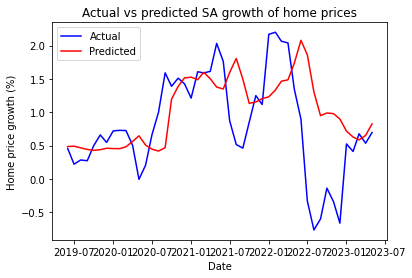

In [41]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [42]:
error = pd.read_csv('linear_regression/median_sale_to_list_ratio_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000068  0.008276  0.006458  1.471489  0.117933
1           1   -2  0.000082  0.009044  0.007192  1.877941 -0.053424
2           2   -3  0.000088  0.009397  0.007515  1.908552 -0.137344
3           3   -4  0.000092  0.009575  0.007665  1.695859 -0.180886
4           4   -5  0.000095  0.009734  0.007790  1.516557 -0.220311
5           5   -6  0.000096  0.009798  0.007825  1.425396 -0.236439


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [43]:
(y, y_hat) = backtest('median_sale_to_list_ratio_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

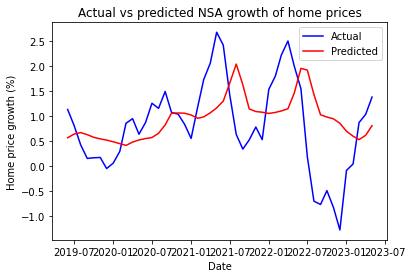

In [44]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using newly pending listings

### Predictions when removing the seasonality

In [45]:
error = pd.read_csv('linear_regression/newly_pending_listings_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000041  0.006403  0.004634  2.858922  0.252192
1           1   -2  0.000044  0.006601  0.004895  2.689903  0.205155
2           2   -3  0.000050  0.007049  0.005163  2.770405  0.093699
3           3   -4  0.000054  0.007356  0.005499  2.777196  0.012993
4           4   -5  0.000056  0.007484  0.005576  2.804380 -0.021646
5           5   -6  0.000056  0.007474  0.005702  2.894698 -0.019055


We get the better results for lag 1. Let us plot the predictions.

In [46]:
data = get_feature('newly_pending_listings_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 6, 1)
(y, y_hat) = backtest('newly_pending_listings_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

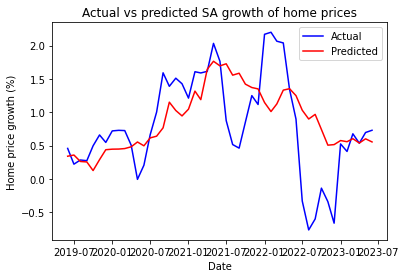

In [47]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [48]:
error = pd.read_csv('linear_regression/newly_pending_listings_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000062  0.007888  0.006100  1.261669  0.189471
1           1   -2  0.000077  0.008748  0.007093  1.649062  0.003009
2           2   -3  0.000084  0.009150  0.007499  1.743823 -0.090701
3           3   -4  0.000084  0.009161  0.007203  1.529691 -0.093312
4           4   -5  0.000087  0.009322  0.007452  1.375727 -0.132068
5           5   -6  0.000090  0.009504  0.007565  1.392615 -0.176651


We get the better results for lag 1. Let us plot the predictions.

In [49]:
(y, y_hat) = backtest('newly_pending_listings_raw', 1, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

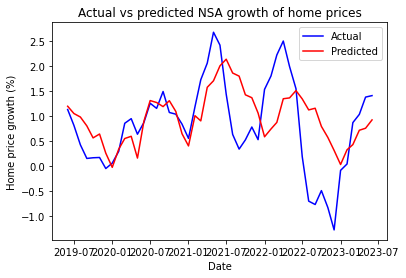

In [50]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using percentage of listings with price cut

### Predictions when removing the seasonality

In [51]:
error = pd.read_csv('linear_regression/pct_listings_price_cut_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000023  0.004774  0.003997  3.100055  0.584300
1           1   -2  0.000030  0.005471  0.004402  2.726776  0.453924
2           2   -3  0.000037  0.006052  0.004809  2.334927  0.331940
3           3   -4  0.000046  0.006747  0.005336  2.529137  0.169679
4           4   -5  0.000053  0.007301  0.005796  2.702094  0.027667
5           5   -6  0.000058  0.007624  0.005892  2.678829 -0.060355


We get the better results for lag 1. Let us plot the predictions.

In [52]:
data = get_feature('pct_listings_price_cut_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 6, 1)
(y, y_hat) = backtest('pct_listings_price_cut_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

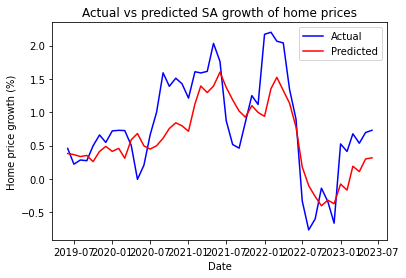

In [53]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [54]:
error = pd.read_csv('linear_regression/pct_listings_price_cut_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000034  0.005812  0.004807  1.185099  0.559963
1           1   -2  0.000026  0.005070  0.004247  1.143790  0.665140
2           2   -3  0.000033  0.005752  0.004502  1.037016  0.568973
3           3   -4  0.000055  0.007393  0.005713  1.221731  0.287897
4           4   -5  0.000076  0.008710  0.006962  1.041086  0.011600
5           5   -6  0.000085  0.009206  0.007501  1.325499 -0.104124


We get the better results for lag 2. Let us plot the predictions.

In [55]:
(y, y_hat) = backtest('pct_listings_price_cut_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

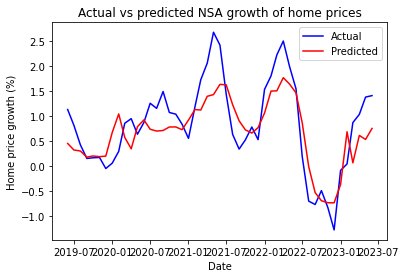

In [56]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using percentage sold above list price

### Predictions when removing the seasonality

In [57]:
error = pd.read_csv('linear_regression/pct_sold_above_list_price_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000052  0.007207  0.004927  3.041348  0.071757
1           1   -2  0.000059  0.007690  0.005322  3.017786 -0.056948
2           2   -3  0.000063  0.007956  0.005601  2.810614 -0.131239
3           3   -4  0.000065  0.008062  0.005712  2.808962 -0.161786
4           4   -5  0.000065  0.008084  0.005868  2.816777 -0.168041
5           5   -6  0.000065  0.008058  0.005921  2.826818 -0.160467


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [58]:
data = get_feature('pct_sold_above_list_price_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 5, 1)
(y, y_hat) = backtest('pct_sold_above_list_price_raw', 2, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

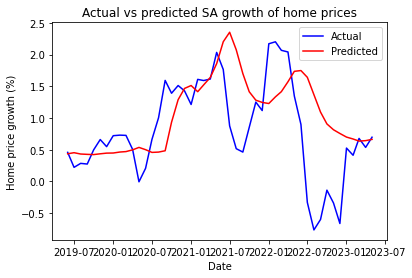

In [59]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [60]:
error = pd.read_csv('linear_regression/pct_sold_above_list_price_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000070  0.008394  0.006361  1.466629  0.092559
1           1   -2  0.000083  0.009105  0.007221  1.860310 -0.067713
2           2   -3  0.000089  0.009425  0.007682  1.957789 -0.144101
3           3   -4  0.000091  0.009549  0.007756  1.859629 -0.174424
4           4   -5  0.000094  0.009715  0.007823  1.673521 -0.215645
5           5   -6  0.000098  0.009881  0.007911  1.547912 -0.257475


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [61]:
(y, y_hat) = backtest('pct_sold_above_list_price_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

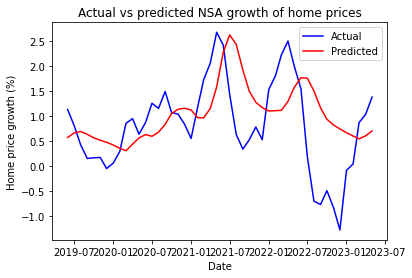

In [62]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')

## Predictions using percentage sold below list price

### Predictions when removing the seasonality

In [63]:
error = pd.read_csv('linear_regression/pct_sold_below_list_price_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000051  0.007176  0.004935  3.380338  0.079619
1           1   -2  0.000058  0.007589  0.005262  3.420413 -0.029274
2           2   -3  0.000061  0.007811  0.005453  3.060470 -0.090450
3           3   -4  0.000063  0.007927  0.005614  2.887128 -0.123123
4           4   -5  0.000065  0.008042  0.005884  2.938034 -0.155951
5           5   -6  0.000065  0.008089  0.005898  2.923756 -0.169365


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [64]:
data = get_feature('pct_sold_below_list_price_raw', datetime(2023, 6, 1))
ds_begin = data['date'].min() + \
    relativedelta(days=1) + \
    relativedelta(months=16)
ds_end = datetime(2023, 5, 1)
(y, y_hat) = backtest('pct_sold_below_list_price_raw', 2, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Actual vs predicted SA growth of home prices')

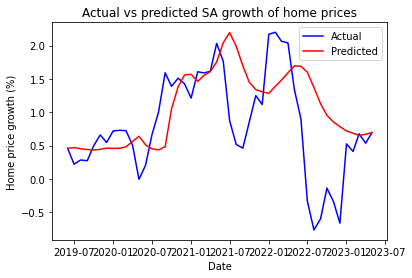

In [65]:
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
                pd.offsets.MonthBegin(1)
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted SA growth of home prices')

### Predictions when keeping the seasonality

In [66]:
error = pd.read_csv('linear_regression/pct_sold_below_list_price_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000071  0.008426  0.006428  1.589237  0.085540
1           1   -2  0.000082  0.009055  0.007248  1.906148 -0.056021
2           2   -3  0.000088  0.009390  0.007631  1.909556 -0.135736
3           3   -4  0.000092  0.009574  0.007684  1.739111 -0.180670
4           4   -5  0.000095  0.009760  0.007836  1.569330 -0.226970
5           5   -6  0.000097  0.009857  0.007849  1.450282 -0.251386


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [67]:
(y, y_hat) = backtest('pct_sold_below_list_price_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Actual vs predicted NSA growth of home prices')

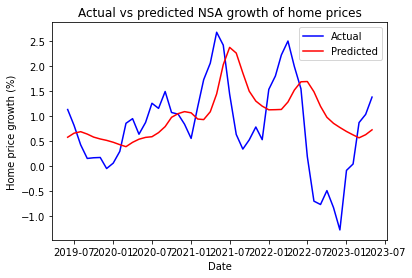

In [68]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Actual vs predicted NSA growth of home prices')